![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [107]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [3]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [4]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [9]:
# Celda 2
# Creación de 10 muestras de bootstrap 
np.random.seed(123)

n_samples = X_train.shape[0]
# número de árboles
n_B = 10

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([3582, 3454, 1346, ...,  826,  801, 5657]),
 array([6962, 3408, 2553, ..., 6611,  877, 6412]),
 array([1917, 3131,  384, ..., 2876, 6449, 6557]),
 array([3849, 4565, 6820, ..., 6835, 4643,  639]),
 array([2468, 3608, 1367, ..., 3108, 2961, 4357]),
 array([3142, 1537, 5966, ..., 3224, 6922, 3396]),
 array([6588, 3753, 1786, ..., 2131, 4627, 5672]),
 array([1289, 3776,  981, ..., 1891, 6034, 6165]),
 array([6079, 3819, 6976, ..., 6478, 2225, 5072]),
 array([3952, 3276,  896, ..., 4589, 1964,  893])]

In [10]:
# Visualización muestra boostrap #1 para entremiento
X_train.iloc[samples[0], :]

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
151599,2016,40999,0,0,0,0,0,1,0
171999,2014,52527,0,0,0,0,0,1,0
304172,2009,123202,0,1,0,0,0,0,0
74828,2015,38807,0,0,0,0,0,1,0
192974,2005,51260,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
134843,2014,22221,0,0,0,0,1,0,0
325075,2013,86593,0,0,0,0,0,1,0
61213,2014,28044,0,0,0,0,0,1,0
181222,2016,49368,0,0,0,0,0,0,1


In [12]:
# Construcción un árbol de decisión para cada muestra boostrap

# Definición del modelo usando DecisionTreeRegressor de sklearn
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# DataFrame para guardar las predicciones de cada árbol
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, sample in enumerate(samples):
    X_new_train = X_train.iloc[sample]
    y_new_train = y_train.iloc[sample]
    treereg.fit(X_new_train, y_new_train)
    y_pred.iloc[:,i] = treereg.predict(X_test)
    
y_pred

,0,1,2,3,4,5,6,7,8,9
257343,14980.0,13993.0,13649.0,13649.0,11788.0,13649.0,13993.0,13990.0,13990.0,13993.0
326011,6492.0,5995.0,5995.0,6987.0,5995.0,5995.0,5995.0,6987.0,5995.0,5995.0
242354,16491.0,16995.0,16491.0,15997.0,15997.0,16491.0,17591.0,16995.0,17404.0,16491.0
266376,21990.0,21990.0,22500.0,21990.0,15900.0,21990.0,22500.0,21990.0,15813.0,21990.0
396954,15988.0,16951.0,15988.0,15988.0,15988.0,17900.0,16951.0,16951.0,15988.0,15988.0
...,...,...,...,...,...,...,...,...,...,...
144298,13836.0,14800.0,14800.0,14800.0,14800.0,14681.0,14800.0,14800.0,13836.0,13836.0
364521,15999.0,14995.0,15999.0,16900.0,15999.0,15999.0,17300.0,15999.0,16900.0,15000.0
120072,23533.0,23533.0,20000.0,17700.0,17700.0,23533.0,17700.0,23533.0,23533.0,20000.0
99878,12989.0,12995.0,12989.0,12995.0,12991.0,12991.0,10995.0,12991.0,12991.0,12893.0


In [15]:
# Desempeño de cada árbol
for i in range(n_B):
    print('Árbol ', i, 'tiene un error: ', np.sqrt(mean_squared_error(y_pred.iloc[:,i], y_test)))

Árbol  0 tiene un error:  2141.613353645869
Árbol  1 tiene un error:  2136.3519863123465
Árbol  2 tiene un error:  2122.718759132052
Árbol  3 tiene un error:  2087.278992468617
Árbol  4 tiene un error:  2168.518742842026
Árbol  5 tiene un error:  2113.8811455834793
Árbol  6 tiene un error:  2127.933470769012
Árbol  7 tiene un error:  2184.414847251443
Árbol  8 tiene un error:  2138.1071697514985
Árbol  9 tiene un error:  2132.097520859104


In [16]:
# Predicciones promedio para cada obserbación del set de test
y_pred.mean(axis=1)

257343    13767.4
326011     6243.1
242354    16694.3
266376    20865.3
396954    16468.1
           ...   
144298    14498.9
364521    16109.0
120072    21076.5
99878     12782.0
387162    11957.4
Length: 3464, dtype: float64

In [17]:
# Error al promediar las predicciones de todos los árboles
np.sqrt(mean_squared_error(y_test, y_pred.mean(axis=1)))

1796.4355868399332

### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [43]:
features = (X_train.shape)[1]
n_features = max(1, int(np.log2(features)))

In [44]:
# Celda 3
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, max_features=n_features,
                          bootstrap=True, oob_score=True, random_state=1)

In [45]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([13138.39594783,  9118.29222051, 15728.73767855, ...,
       17619.48270546, 12510.3354744 , 12990.12466275])

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

2013.353269091173

### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [64]:
# Celda 4
dtr = RandomForestRegressor()
dtr.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = dtr.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred))

1758.4448674625064

### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [95]:
# cantidad de variables predictoras
rfr = RandomForestRegressor(max_features = 7,max_depth = 6,n_estimators=120)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1575.5803429576592

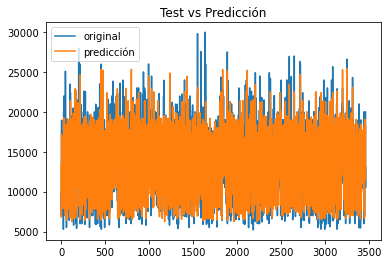

In [117]:
x_rfr = range(len(y_test))
plt.plot(x_rfr, y_test, label="original")
plt.plot(x_rfr, y_pred, label="predicción")
plt.title("Test vs Predicción")
plt.legend()
plt.show()

## Max depth

In [77]:
# cuanto crecera el árbol
rfr_md = RandomForestRegressor(max_depth = 6)
rfr_md.fit(X_train, y_train)
y_pred_md = rfr_md.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_md))

1582.171743767029

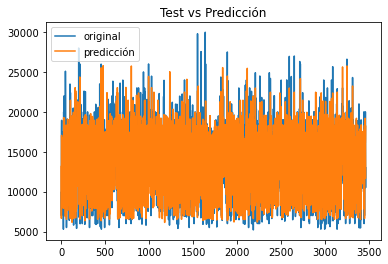

In [116]:
x_md = range(len(y_test))
plt.plot(x_md, y_test, label="original")
plt.plot(x_md, y_pred_md, label="predicción")
plt.title("Test vs Predicción")
plt.legend()
plt.show()

## max_features

In [80]:
# cantidad de variables predictoras
rfr_mf = RandomForestRegressor(max_features = 7)
rfr_mf.fit(X_train, y_train)
y_pred_mf = rfr_mf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_mf))

1770.6398709683829

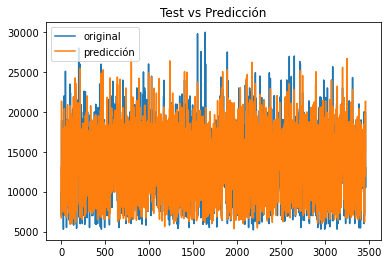

In [115]:
x_mf = range(len(y_test))
plt.plot(x_mf, y_test, label="original")
plt.plot(x_mf, y_pred_mf, label="predicción")
plt.title("Test vs Predicción")
plt.legend()
plt.show()

## n_estimators

In [81]:
# cantidad de árboles
rfr_ne = RandomForestRegressor(n_estimators=120)
rfr_ne.fit(X_train, y_train)
y_pred_ne = rfr_ne.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_ne))

1761.8238031445846

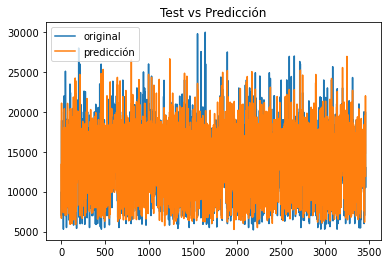

In [113]:
x_ne = range(len(y_test))
plt.plot(x_ne, y_test, label="original")
plt.plot(x_ne, y_pred_ne, label="predicción")
plt.title("Test vs Predicción")
plt.legend()
plt.show()

### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [105]:
# Celda 6
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

score = xgb.score(X_train, y_train)
print("Training score: ",score)

scores = cross_val_score(xgb, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

mse = mean_squared_error(y_test, y_pred_xgb)
print("MSE: %.2f" % mse)

Training score:  0.9147045779338181
Mean cross-validation score: 0.84
MSE: 2629001.84


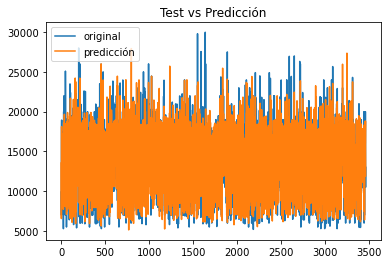

In [114]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_xgb, label="predicción")
plt.title("Test vs Predicción")
plt.legend()
plt.show()

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [148]:
# Celda 7
xgbp = XGBRegressor(learning_rate = 0.9, gamma=100, colsample_bytree=1)
xgbp.fit(X_train, y_train)
y_pred_xgbp = xgbp.predict(X_test)

scorep = xgbp.score(X_train, y_train)
print("Training score: ",scorep)

scoresp = cross_val_score(xgbp, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scoresp.mean())

msep = mean_squared_error(y_test, y_pred_xgbp)
print("MSE: %.2f" % msep)

Training score:  0.9545517059184135
Mean cross-validation score: 0.79
MSE: 3284821.20


### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
